shell script

In [ ]:
#shell 编写流程
#需求分析 -> 脚本编写 -> 命令测试 -> 测试调优
#脚本.sh 结尾  <以下为示例>

---------------------------------------------------------
#!/bin/bash

COUNT=1 # shell的空格敏感，等号左右不能有空格 变量名一般大写
echo $COUNT # $取值   ！！！变量命名不能有连词符、空格、特殊字符！！！
echo "Hello, World!"
pwd

unset COUNT # 删除变量
echo $COUNT # 变量被删除后取值为空，输出为空行

#只读变量
readonly PI=3.14 # 变量不能被修改 无法unset删除 readonly修饰

#位置变量和预定义变量
echo $0 # 相当一个占位符，代表脚本名称，在执行时 ./script.sh（传给$0） -参数1（传给$1） -参数2（传给$2） ...
echo $1 # 第一个参数
echo $2 # 第二个参数
...
echo ${10} # 如果参数超过9个，需要用大括号括起来，否则只认最左一位

echo $# # 统计参数个数，不包含脚本名称$0
echo $@ # 输出所有参数（参数间独立），不包含脚本名称$0，“$1” “$2” ...
echo $* # 输出所有参数（参数为整体），不包含脚本名称$0，“$1 $2 ...”
echo $? # 判断表达式真假/或上一个命令的退出状态，0表示成功，非0表示失败
echo $$ # 当前脚本的进程ID

#环境变量
$USER # 当前用户名
$HOME # 当前用户的主目录
$PWD # 当前工作目录
$SHELL # 当前用户的默认shell
$PATH # 可执行用户程序的默认搜索路径

---------------------------------------------------------
#以上的脚本有三种运行方式
#1. 直接运行脚本：./script.sh
#2. 作为可执行文件运行：chmod +x script.sh  ./script.sh
#3. 作为命令运行：source script.sh  或 . script.sh
#4. bash shell命令直接运行脚本：bash script.sh 
---------------------------------------------------------
#shell 语句有 <说明性语句>  <功能性语句>  <控制语句>
# 说明性语句 （类似py注释）

# 功能性语句 
    #read命令
    read [选项] [变量名1,变量名2...]
            -p 输出提示内容 "pleasa input:"
            -t 超时时间 单位秒.到点结束
            -s 静默模式（隐藏输入内容）
    #算数运算
    expr #兼容性好，但是不支持浮点数运算
        e.g.
        A=3
        B=5
        C=$A+$B #输出3+5 且运算符要空格隔开
        C=`expr $A + $B` #`...`（tab上按键）是命令置换 输出8
        C=`expr \( $A + $B \) \* 2` #需要用\( \)括起来转义，否则会报错,且只有乘法*还要 \* 转义

    $((......)) #支持浮点数运算
        e.g.
        C=$(((A+B)*2)) #大大简化

    let
        e.g.
        let C=(A+B)*2 
        xx let C=(A+B)*2  #错误！let又不能有空格了！！！
        #除非
        let "C=(A+B)*2" 
        let C++ #let支持自增运算

    #test命令
    test 表达式
    [ 表达式 ] # 简化写法 注意空格
        数值比较运算符
        -eq 等于为真
        -ne 不等于为真
        -gt 大于为真
        -ge 大于等于为真
        -lt 小于为真
        -le 小于等于为真

        字符串比较运算符
        =/== 等于为真
        != 不等于为真
        -z 字符串长度为0为真
        -n 字符串长度不为0为真

        文件属性测试运算符
        -e 文件存在为真
        -f 文件存在且为普通文件为真
        -d 文件存在且为目录为真
        -r 文件存在且可读为真
        -w 文件存在且可写为真
        -x 文件存在且可执行为真
        -s 文件存在且非空为真

        逻辑运算符
        -a 与(and)
        -o 或(or)
        ! 非(not) 

        PS: [ "$var" = "hello" ]  # 变量最好加引号，防止变量为空时报错；并且运算符左右、方括号左右也需要空格隔开
---------------------------------------------------------
# 控制语句
    #分支语句
    if [判断条件]; then
        ...
    elif [判断条件]; then #或者双路直接写elif
        ...
    fi # 结束if语句


    case $变量名 in
        模式1)
            命令1
            ;; # 每个模式结尾需要两个分号
        模式2)
            命令2
            ;;
        *) # 通配符，匹配所有其他情况，默认情况
            ...
            ;;
    esac # 结束case语句


    #循环语句
    for 变量名 in 值1 值2 ... 值n
    do
        ... # 执行命令
    done


    while [ 条件 ]
    do
        ... # 执行命令
    done

    #循环控制语句
    break # 跳出整个循环
    continue # 跳过当前迭代，继续下一次迭代


查看文件

In [ ]:
#查看、合并文件
cat -n (显示行号) -b (只给非空行编号)  -s (合并多余空行)
    e.g.
    cat f1.txt f2.txt > new.txt  # 合并文件f1和f2到new(>先清空目标文件 >>追加到目标文件)

# 从下往上显示文件内容
tac -s (指定分隔符,倒序，分隔符之间内容原封不动输出)

#分页显示文件内容
more 

#分页显示文件内容，功能更强大
less -N （显示行号）-X （退出时不清屏）
  进入less后, /关键字（向下搜索） ？关键字（向上搜索） q退出

#显示文件前n行
head # 默认10行 -n 行数 -c 字节数 -q 不显示文件名
    e.g.
    ls -l | head -n 5  # '|'是管道符，将ls -l命令的输出作为head的输入（命令不能直接为输入）输出ls -l输出的前5行

#显示文件后n行
tail # 默认10行 -n 行数 -c 字节数 -q 不显示文件名 -f 实时显示文件新增内容

#带行号显示文件内容
nl


输入输出

In [ ]:
#类print，输出内容到标准输出（屏幕）
echo "内容" # 默认自动换行
           -n (不输出尾随换行符)  -e (启用反斜杠转义)  -E (禁用反斜杠转义，默认)


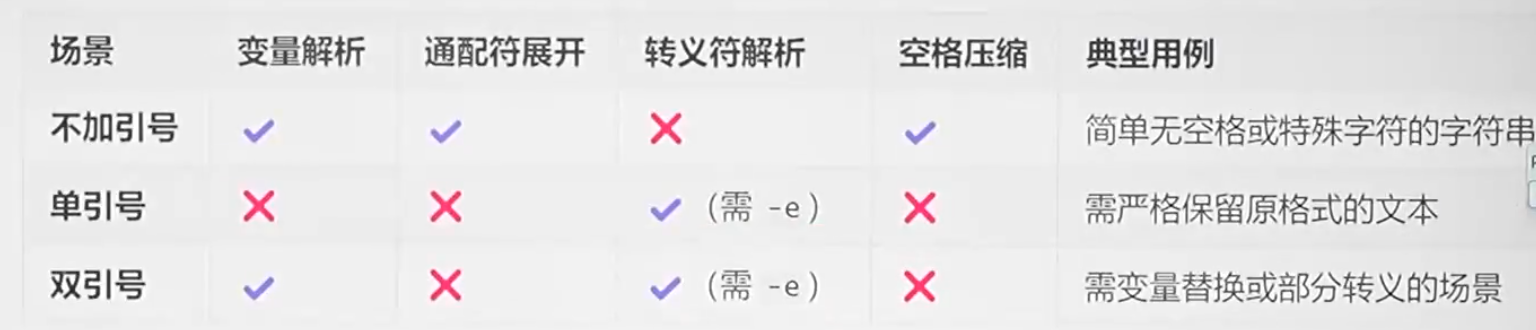

In [ ]:
#重定向输出   e.g. 1输出工程所有报错信息到新文件error.log 2记录系统启动日志到startup.log 3代码执行进行操作记录mark.log
    #文件描述符
    0 标准输入 stdin 默认从键盘读取
    1 标准输出 stdout 默认输出到终端屏幕
    2 标准错误 stderr 默认输出到终端屏幕
    #重定向符号
    > 重定向标准输出(等同于1>)
    2> 重定向标准错误
    &> 同时重定向标准输出和标准错误
    >> 追加重定向标准输出(等同于1>>)
    2>> 追加重定向标准错误
    &>> 同时追加重定向标准输出和标准错误

#输出重定向
    echo "内容" > file.txt # 覆盖写入(其实是删除了原同名文件)
    echo "内容" >> file.txt # 追加写入
                2> error.log # 重定向标准错误到error.log文件
                &> error.log # 同时重定向标准输出和标准错误到error.log文件
                2>&1         # 将标准错误重定向到标准输出（终端或文件）

    wc #补充命令
       -l 统计行数 -w 统计单词数（以空格、制表符、换行符等分隔） -c 统计字节数 -m 统计字符数（与编码有关）

#管道符 |
命令1 | 命令2 # 将命令1的标准输出作为命令2的标准输入 即前一stdout传给后一stdin

#命令置换  将前命令stdout作为另一命令的参数或变量值
`命令` # 注意是反引号tab上按键  通过转义符号\实现多层嵌套（类unix系统通用） 需手动处理转义字符、空格、$等符号
$(命令) # 推荐用法，更清晰  直接支持多层嵌套，自动处理特殊字符（如空格、$等）

#显示终端输入历史命令记录
history #默认记录存储在~/.bash_history文件中
        -c 清除历史记录 -d N 删除第N条记录 -a 将当前会话历史追加到历史文件中 -w 将当前会话历史写入历史文件中 -r 从历史文件中读取历史记录到当前会话 -n 显示最近N条历史记录


In [ ]:
#通配符
* # 匹配0个或多个任意字符
? # 匹配任意单个字符
[abc] # 匹配方括号内的任意一个字符 a或b或c
[^...] # 匹配不在方括号内的任意一个字符
[a-z] # 匹配指定范围内的任意一个字符 a到z  或者[1-9]
...自己deepseek去吧


文件搜索

In [ ]:
#指定目录下递归搜索文件和目录
find [起始路径] [选项] [操作] -name (精准查找) -iname (模糊，不区分大小写) -type f (文件) -type d (目录) -exec 具体命令名称 {相关命令参数} (对查找到的每个文件执行某个命令)
#查找<文件内容>,多用于日志分析
grep [选项] [查找内容] [查找范围] -i (不区分大小写) -n (显示行号) -v (显示不匹配的行) -r (递归查找) -c (统计匹配行数) -w (匹配整个单词)
#查找并显示<可执行文件>绝对命令，仅搜索PATH环境变量下的目录，默认返回第一个匹配结果
which [命令名称] -a (显示所有匹配结果) 
#查找并显示<与命令相关的文件>
whereis [命令名称] -b (只显示二进制文件路径) -s (只显示源代码文件路径) -m (只显示帮助文件路径,即man手册) 


文件管理

In [ ]:
#常用的压缩方式
.tar      无压缩            最快    仅归档多个文件/目录，不支持压缩
.tar.gz   gzip压缩,中等     较快    通用，平衡压缩率和速度
.tar.bz2  bzip2压缩,较高    较慢    高压缩率（备份大型文件）
.zip      zip压缩,中等      中等    跨平台

#常用的解压方式
tar -xvf <file>.tar      解压 tar 包 #tar 使用 -C（大写）参数指定解压目录
tar -cvf <file>.tar 目标文件/目录 #归档文件，不压缩

tar -xzvf <file>.tar.gz  解压tar.gz
tar -xjvf <file>.tar.bz2 解压 tar.bz2 #-t 列出归档内容(查看不解压)，-v 显示详细信息，-f 指定文件。-xvf会直接解压文件。zip -l 仅适用于 ZIP 格式。bzcat 直接输出 bzip2 压缩内容（非归档结构）
unzip <file>.zip         解压 zip 包


权限管理

In [ ]:
#查看当前目录文件权限
ls -l

r可读    w可写    x可执行

 u自己    g同组    o其他
-rwx     rwx     rwx
#（二进制）
-111     111     111

#（八进制）
0 7       7       7

# eg.
-rwxrw-r--
-111110100
0764

#修改文件权限
chmod 
字母法 chmod (u/g/o/a)(+/-/=)(r/w/x) 文件/目录名
数字法 chmod 数字组合 文件/目录名


#超级用户
su   #切换到超级用户
sudo #临时切换到超级用户（单命令）


软件管理

In [ ]:
apt remove #仅删除软件包，保留配置文件
apt purge #删除软件包及其配置文件
apt autoremove #删除不再需要的软件包及其配置文件

apt autoclean #清理本地缓存的安装包文件，与卸载无关
